In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools

%matplotlib inline

In [2]:
# Read LFS data (after cleaning)
fn = "LFS_cleaned.tsv"
df = pd.read_csv(fn,sep="\t")

In [3]:
# Function to plot the number and age of onset for different groups for a categorical variable
def plot_number_and_age(df,column_name,groups,f_size=(6, 4)):
    plt.figure(figsize=f_size)
    
    # plot number of patients for each group
    plt.subplot(2,1,1)
    sns.countplot(y=column_name,data=df[df[column_name].isin(groups)])
    
    # plot age of onset for each group
    plt.subplot(2,1,2)
    sns.barplot(x= 'Age_at_diagnosis',y=column_name,data=df[df[column_name].isin(groups)])
    
    plt.tight_layout()

In [4]:
# Function to compare the age of onset difference

def cal_age_diff(df,column_name,groups,p_sig=0.01):
    
    group_data = [df[df[column_name]==group]['Age_at_diagnosis'].tolist() for group in groups]
    _, p_all = stats.kruskal(*group_data)
    
    if p_all < p_sig:
        print('* The distributions of age of onset of all samples are NOT equal (p={:.1e})'.format(p_all))
        return 1
    else:
        print('* The distributions of age of onset of all samples are equal (p={:.1e})'.format(p_all))
        return 0

In [5]:
# Function to compare the age of onset difference among different groups in a categorical variable
def cal_age_diff_by_group(df,column_name,groups,p_sig=0.01):
    
    group_data = [df[df[column_name]==group]['Age_at_diagnosis'].tolist() for group in groups]
    _, p_all = stats.kruskal(*group_data)

    list_pairs = list(itertools.combinations(groups, 2)) # get all possible pairs
    sig, no_sig = [],[] # collect the list of pair with no significant difference
    
    for pair in list_pairs:
        # apply Mann-Whitney test to compare two groups
        _, p = stats.mannwhitneyu(df[df[column_name]==pair[0]]['Age_at_diagnosis'], 
                            df[df[column_name]==pair[1]]['Age_at_diagnosis'])
        if p<p_sig:
            sig.append(" vs ".join(pair)+' (p = {:.1e})'.format(p))
        else:
            no_sig.append(" vs ".join(pair)+' (p = {:.1e})'.format(p))
    
    if len(sig)>0:
        print('* Group with significant difference (Mann-Whitney test p-value < {}):'.format(p_sig))
        print('\t'+'\n\t'.join(sig))
    
    if len(no_sig)>0:
        print('* Group with no significant difference (Mann-Whitney test p-value >= {}):'.format(p_sig))
        print('\t'+'\n\t'.join(no_sig))

## The effect of single feature

In [6]:
effect_features = {'with_effect':[],
                   'no_effect':[]}

### 1. Gender

#### 1.1. Collect the list of category for selected feature 

In [7]:
# Check the number of each category
col_name = 'Sex'
df[col_name].value_counts()

F    1277
M     777
Name: Sex, dtype: int64

In [8]:
# Create the list of catagories
gender_types = [x for x in set(df[col_name].tolist()) if x is not np.nan]
gender_types

['M', 'F']

#### 1.2. Plot the number and the 'age at diagnosis' for each category

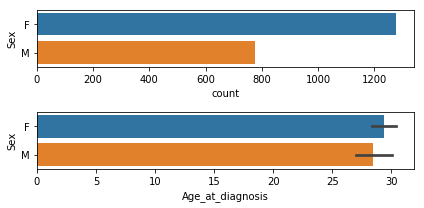

In [9]:
plot_number_and_age(df,'Sex',gender_types,(6,3))

#### 1.3. Calculate the significance of 'age at diagnosis' difference with Mann-Whitney test 

In [10]:
effect = cal_age_diff(df,col_name,gender_types)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are equal (p=9.7e-02)


In [11]:
cal_age_diff_by_group(df,col_name,gender_types)

* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	M vs F (p = 4.8e-02)


### 2. Tumor sites

#### 2.1. Collect the list of category for selected feature 

In [12]:
# Check the number of each category
col_name = 'Short_topo_combined'
df[col_name].value_counts()

BREAST                           587
BRAIN                            317
SOFT TISSUES                     225
ADRENAL GLAND                    205
BONES (other)                    131
STOMACH                           74
HEMATOP. SYSTEM                   73
LUNG                              72
UNKNOWN SITE                      71
COLON                             40
PROSTATE                          34
OVARY                             27
COLORECTUM, NOS                   26
LIVER                             26
PANCREAS                          24
SKIN                              19
UTERUS                            19
BONES (limbs)                     17
LYMPH NODES                       17
KIDNEY                            16
TESTIS                            15
ESOPHAGUS                         11
NERVES                             9
THYROID                            9
CERVIX UTERI                       8
PERITONEUM                         7
OTHER SITES                        7
B

In [13]:
# Take common mutation type, remove the mutation types with too few patients
common_cancers = []
for cancer, count in df[col_name].value_counts().iteritems():
    if count>50:
        common_cancers.append(cancer)
common_cancers

['BREAST',
 'BRAIN',
 'SOFT TISSUES',
 'ADRENAL GLAND',
 'BONES (other)',
 'STOMACH',
 'HEMATOP. SYSTEM',
 'LUNG',
 'UNKNOWN SITE']

#### 2.2. Plot the number and the 'age at diagnosis' for each category

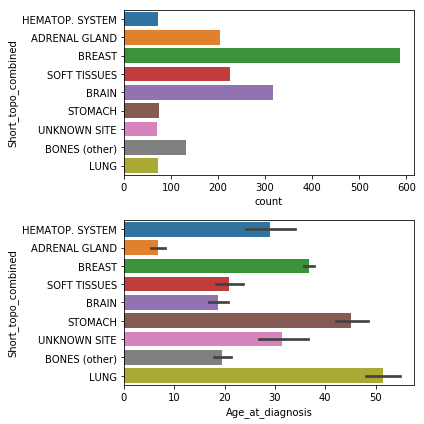

In [14]:
plot_number_and_age(df,col_name,common_cancers,(6,6))

#### 2.3. Calculate the significance of 'age at diagnosis' difference

In [15]:
effect = cal_age_diff(df,col_name,common_cancers)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=2.8e-150)


In [16]:
cal_age_diff_by_group(df,col_name,common_cancers)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	BREAST vs BRAIN (p = 1.0e-54)
	BREAST vs SOFT TISSUES (p = 4.9e-27)
	BREAST vs ADRENAL GLAND (p = 4.4e-87)
	BREAST vs BONES (other) (p = 4.1e-45)
	BREAST vs STOMACH (p = 3.8e-07)
	BREAST vs HEMATOP. SYSTEM (p = 1.9e-05)
	BREAST vs LUNG (p = 8.7e-15)
	BREAST vs UNKNOWN SITE (p = 8.4e-03)
	BRAIN vs ADRENAL GLAND (p = 7.4e-25)
	BRAIN vs BONES (other) (p = 1.3e-03)
	BRAIN vs STOMACH (p = 7.8e-24)
	BRAIN vs HEMATOP. SYSTEM (p = 1.1e-05)
	BRAIN vs LUNG (p = 3.6e-28)
	BRAIN vs UNKNOWN SITE (p = 6.4e-06)
	SOFT TISSUES vs ADRENAL GLAND (p = 1.3e-17)
	SOFT TISSUES vs STOMACH (p = 1.4e-16)
	SOFT TISSUES vs HEMATOP. SYSTEM (p = 2.2e-04)
	SOFT TISSUES vs LUNG (p = 5.7e-21)
	SOFT TISSUES vs UNKNOWN SITE (p = 1.2e-04)
	ADRENAL GLAND vs BONES (other) (p = 1.9e-33)
	ADRENAL GLAND vs STOMACH (p = 1.9e-34)
	ADRENAL GLAND vs HEMATOP. SYSTEM (p = 9.8e-23)
	ADRENAL GLAND vs LUNG (p = 9.1e-35)
	ADRENAL GLAND vs UNKNOWN SITE (p = 3.6e-19

### 3. Mutation types

#### 3.1. Collect the list of category for selected feature 

In [17]:
# Check the number of each category
col_name = 'Effect'
df[col_name].value_counts()

missense     1546
splice        207
nonsense      184
FS            156
other          50
large del      32
silent          7
intronic        5
Name: Effect, dtype: int64

In [18]:
# Take common mutation type, remove the mutation types with too few patients
common_muts = []
for mut, count in df[col_name].value_counts().iteritems():
    if count>50:
        common_muts.append(mut)
common_muts

['missense', 'splice', 'nonsense', 'FS']

#### 3.2. Plot the number and the 'age at diagnosis' for each category

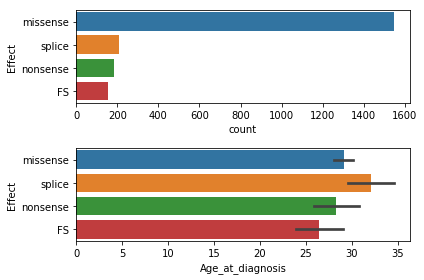

In [19]:
plot_number_and_age(df,'Effect',common_muts,(6,4))

#### 3.3. Calculate the significance of 'age at diagnosis' difference

In [20]:
effect = cal_age_diff(df,col_name,common_muts)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are equal (p=6.2e-02)


In [21]:
cal_age_diff_by_group(df,col_name,common_muts)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	splice vs FS (p = 2.1e-03)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	missense vs splice (p = 2.0e-02)
	missense vs nonsense (p = 3.5e-01)
	missense vs FS (p = 9.9e-02)
	splice vs nonsense (p = 2.0e-02)
	nonsense vs FS (p = 1.9e-01)


### 4. Domain function

#### 4.1. Collect the list of category for selected feature 

In [22]:
# Check the number of each category
col_name = 'Domain_function'
df[col_name].value_counts()

DNA binding                 1561
Tetramerisation              247
Tetramerisation/NES           43
SH3-like/Pro-rich             23
Regulation                     9
Transactivation TAD2           7
Transactivation TAD1/NES       7
Transactivation TAD1           6
Regulation/NLS                 1
Name: Domain_function, dtype: int64

In [23]:
# Take common mutation type, remove the mutation types with too few patients
common_func = []
for func, count in df[col_name].value_counts().iteritems():
    if count>20:
        common_func.append(func)
common_func

['DNA binding', 'Tetramerisation', 'Tetramerisation/NES', 'SH3-like/Pro-rich']

#### 4.2. Plot the number and the 'age at diagnosis' for each category

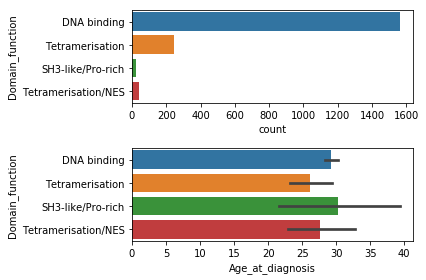

In [24]:
plot_number_and_age(df,col_name,common_func,(6,4))

#### 4.3. Calculate the significance of 'age at diagnosis' difference

In [25]:
effect = cal_age_diff(df,col_name,common_func)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are equal (p=2.6e-02)


In [26]:
cal_age_diff_by_group(df,col_name,common_func)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	DNA binding vs Tetramerisation (p = 1.5e-03)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	DNA binding vs Tetramerisation/NES (p = 2.9e-01)
	DNA binding vs SH3-like/Pro-rich (p = 3.9e-01)
	Tetramerisation vs Tetramerisation/NES (p = 1.4e-01)
	Tetramerisation vs SH3-like/Pro-rich (p = 9.9e-02)
	Tetramerisation/NES vs SH3-like/Pro-rich (p = 3.7e-01)


### 5. Residue function

#### 5.1. Collect the list of category for selected feature 

In [27]:
# Check the number of each category
col_name = 'Residue_function'
df[col_name].value_counts()

Buried                                         764
DNA binding                                    317
Tetramerisation/Methylation site               224
Partially exposed                              207
Exposed                                        147
Zn binding                                      43
Phosphorylation site                            33
S-glutathionylation site                        14
Tetramerisation                                 10
ADP-ribosylation                                 7
Acetylation/Ubiquitination site                  4
Acetylation site                                 3
Ubiquitination site                              3
Methylation site                                 2
Acetylation/Methylation/Ubiquitination site      1
Name: Residue_function, dtype: int64

In [28]:
# Take common mutation type, remove the mutation types with too few patients
common_res_func = []
for res_func, count in df[col_name].value_counts().iteritems():
    if count>50:
        common_res_func.append(res_func)
common_res_func

['Buried',
 'DNA binding',
 'Tetramerisation/Methylation site',
 'Partially exposed',
 'Exposed']

#### 5.2. Plot the number and the 'age at diagnosis' for each category

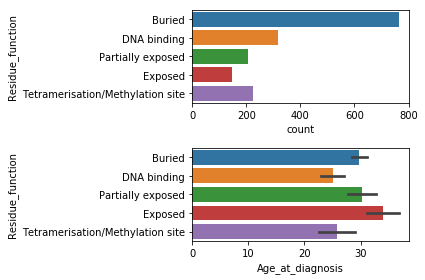

In [29]:
plot_number_and_age(df,col_name,common_res_func,(6,4))

#### 5.3. Calculate the significance of 'age at diagnosis' difference with Mann-Whitney test 

In [30]:
effect = cal_age_diff(df,col_name,common_res_func)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=4.9e-07)


In [31]:
cal_age_diff_by_group(df,col_name,common_res_func)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	Buried vs DNA binding (p = 7.1e-05)
	Buried vs Tetramerisation/Methylation site (p = 1.2e-03)
	Buried vs Exposed (p = 4.6e-03)
	DNA binding vs Partially exposed (p = 4.6e-04)
	DNA binding vs Exposed (p = 2.4e-07)
	Tetramerisation/Methylation site vs Partially exposed (p = 7.3e-03)
	Tetramerisation/Methylation site vs Exposed (p = 4.4e-05)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	Buried vs Partially exposed (p = 2.9e-01)
	DNA binding vs Tetramerisation/Methylation site (p = 2.9e-01)
	Partially exposed vs Exposed (p = 3.9e-02)


### 6. Population

#### 6.1. Collect the list of category for selected feature 

In [32]:
# Check the number of each category
col_name = 'Population'
df[col_name].value_counts()

Northern America              617
Western Europe                406
South America                 284
Northern Europe               251
Southern Europe               134
Eastern Asia                  126
Australia/New Zealand         118
Eastern Europe                 61
Western Asia                   59
South Eastern Asia             42
More developed regions,NOS     29
South Central Asia             12
Central America                 7
Northern Africa                 5
Europe, NOS                     1
Micronesia                      1
Name: Population, dtype: int64

In [33]:
# Take common mutation type, remove the mutation types with too few patients
common_pop = []
for pop, count in df[col_name].value_counts().iteritems():
    if count>40:
        common_pop.append(pop)
common_pop

['Northern America',
 'Western Europe',
 'South America',
 'Northern Europe',
 'Southern Europe',
 'Eastern Asia',
 'Australia/New Zealand',
 'Eastern Europe',
 'Western Asia',
 'South Eastern Asia']

#### 6.2. Plot the number and the 'age at diagnosis' for each category

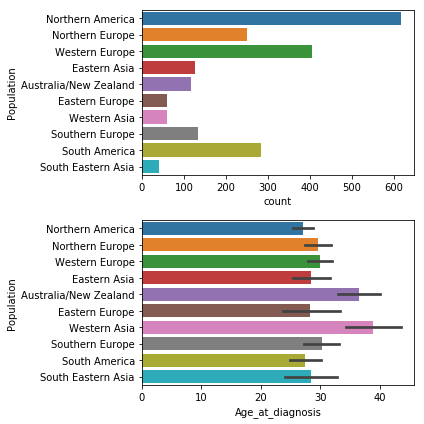

In [34]:
plot_number_and_age(df,col_name,common_pop,(6,6))

#### 6.3. Calculate the significance of 'age at diagnosis' difference

In [35]:
effect = cal_age_diff(df,col_name,common_pop)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=6.4e-07)


In [36]:
cal_age_diff_by_group(df,col_name,common_pop)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	Northern America vs Western Europe (p = 7.9e-03)
	Northern America vs Northern Europe (p = 9.6e-03)
	Northern America vs Australia/New Zealand (p = 4.7e-07)
	Northern America vs Western Asia (p = 2.1e-06)
	Western Europe vs Australia/New Zealand (p = 6.5e-04)
	Western Europe vs Western Asia (p = 2.9e-04)
	South America vs Australia/New Zealand (p = 7.6e-05)
	South America vs Western Asia (p = 1.4e-04)
	Northern Europe vs Australia/New Zealand (p = 9.3e-04)
	Northern Europe vs Western Asia (p = 2.4e-04)
	Southern Europe vs Australia/New Zealand (p = 8.9e-03)
	Southern Europe vs Western Asia (p = 1.6e-03)
	Eastern Asia vs Australia/New Zealand (p = 1.1e-03)
	Eastern Asia vs Western Asia (p = 2.6e-04)
	Australia/New Zealand vs Eastern Europe (p = 5.7e-03)
	Australia/New Zealand vs South Eastern Asia (p = 5.3e-03)
	Eastern Europe vs Western Asia (p = 2.1e-03)
	Western Asia vs South Eastern Asia (p = 4.9e-04)
* Group w

### 7. Region

#### 7.1. Collect the list of category for selected feature 

In [37]:
# Check the number of each category
col_name = 'Region'
df[col_name].value_counts()

Americas                      908
Europe                        853
Asia                          239
Western Pacific               119
More developed regions,NOS     29
Africa                          5
Name: Region, dtype: int64

In [38]:
# Take common mutation type, remove the mutation types with too few patients
common_reg = []
for reg, count in df[col_name].value_counts().iteritems():
    if count>100:
        common_reg.append(reg)
common_reg

['Americas', 'Europe', 'Asia', 'Western Pacific']

#### 7.2. Plot the number and the 'age at diagnosis' for each category

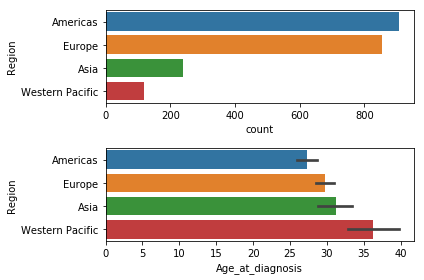

In [39]:
plot_number_and_age(df,'Region',common_reg,(6,4))

#### 7.3. Calculate the significance of 'age at diagnosis' difference

In [40]:
effect = cal_age_diff(df,col_name,common_reg)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=5.1e-07)


In [41]:
cal_age_diff_by_group(df,col_name,common_reg)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	Americas vs Europe (p = 5.3e-04)
	Americas vs Asia (p = 3.0e-04)
	Americas vs Western Pacific (p = 2.2e-06)
	Europe vs Western Pacific (p = 5.0e-04)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	Europe vs Asia (p = 1.1e-01)
	Asia vs Western Pacific (p = 1.3e-02)


### 8. DNE class

#### 8.1. Collect the list of category for selected feature 

In [42]:
# Check the number of each category
col_name = 'DNEclass'
df['DNEclass'].value_counts()

Moderate    528
Yes         516
No          290
Name: DNEclass, dtype: int64

In [43]:
# get the list of disease class, remove nan
DNEs = [c for c in set(df[col_name].tolist()) if c is not np.nan]
DNEs

['Yes', 'No', 'Moderate']

#### 8.2. Plot the number and the 'age at diagnosis' for each category

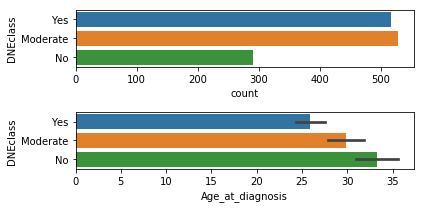

In [44]:
plot_number_and_age(df,col_name,DNEs,(6,3))

#### 8.3. Calculate the significance of 'age at diagnosis' difference

In [45]:
effect = cal_age_diff(df,col_name,DNEs)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=1.1e-05)


In [46]:
cal_age_diff_by_group(df,col_name,DNEs)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	Yes vs No (p = 3.9e-07)
	Yes vs Moderate (p = 3.4e-03)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	No vs Moderate (p = 2.2e-02)


### 9. AGVGD Class

#### 9.1. Collect the list of category for selected feature 

In [47]:
# Check the number of each category
col_name = 'AGVGDClass'
df[col_name].value_counts()

C65    526
C0     347
C25    215
C55    168
C35    149
C45     81
C15     60
Name: AGVGDClass, dtype: int64

In [48]:
# get the list of disease class, remove nan
AGVGDs = [c for c in set(df[col_name].tolist()) if c is not np.nan]
AGVGDs

['C15', 'C35', 'C45', 'C25', 'C0', 'C65', 'C55']

#### 9.2. Plot the number and the 'age at diagnosis' for each category

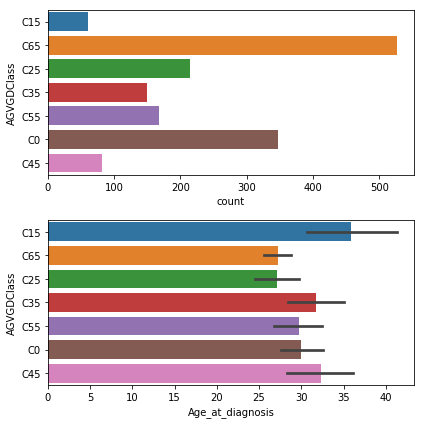

In [49]:
plot_number_and_age(df,col_name,AGVGDs,(6,6))

#### 9.3. Calculate the significance of 'age at diagnosis' difference

In [50]:
effect = cal_age_diff(df,col_name,AGVGDs)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=5.7e-03)


In [51]:
cal_age_diff_by_group(df,col_name,AGVGDs)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	C15 vs C25 (p = 1.2e-03)
	C15 vs C65 (p = 7.3e-04)
	C35 vs C65 (p = 8.1e-03)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	C15 vs C35 (p = 1.0e-01)
	C15 vs C45 (p = 1.2e-01)
	C15 vs C0 (p = 2.2e-02)
	C15 vs C55 (p = 1.7e-02)
	C35 vs C45 (p = 4.3e-01)
	C35 vs C25 (p = 1.4e-02)
	C35 vs C0 (p = 1.3e-01)
	C35 vs C55 (p = 2.1e-01)
	C45 vs C25 (p = 1.9e-02)
	C45 vs C0 (p = 2.2e-01)
	C45 vs C65 (p = 1.2e-02)
	C45 vs C55 (p = 2.4e-01)
	C25 vs C0 (p = 1.0e-01)
	C25 vs C65 (p = 4.5e-01)
	C25 vs C55 (p = 5.6e-02)
	C0 vs C65 (p = 8.5e-02)
	C0 vs C55 (p = 4.7e-01)
	C65 vs C55 (p = 4.6e-02)


### 10. SIFT Class

#### 10.1. Collect the list of category for selected feature 

In [52]:
# Check the number of each category
col_name = 'SIFTClass'
df[col_name].value_counts()

Damaging     1448
Tolerated     152
Name: SIFTClass, dtype: int64

In [53]:
# get the list of disease class, remove nan
SIFTs = [c for c in set(df[col_name].tolist()) if c is not np.nan]
SIFTs

['Tolerated', 'Damaging']

#### 10.2. Plot the number and the 'age at diagnosis' for each category

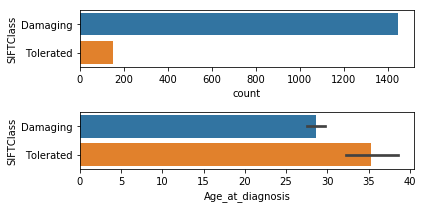

In [54]:
plot_number_and_age(df,col_name,SIFTs,(6,3))

#### 10.3. Calculate the significance of 'age at diagnosis' difference

In [55]:
effect = cal_age_diff(df,col_name,SIFTs)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=6.1e-05)


In [56]:
cal_age_diff_by_group(df,col_name,SIFTs)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	Tolerated vs Damaging (p = 3.0e-05)


### 11. Polyphen2

#### 11.1. Collect the list of category for selected feature 

In [57]:
# Check the number of each category
col_name = 'Polyphen2' 
df[col_name].value_counts()

D    1184
P     291
B      67
Name: Polyphen2, dtype: int64

In [58]:
# get the list of disease class, remove nan
PP2s = [c for c in set(df[col_name].tolist()) if c is not np.nan]
PP2s

['P', 'B', 'D']

#### 11.2. Plot the number and the 'age at diagnosis' for each category

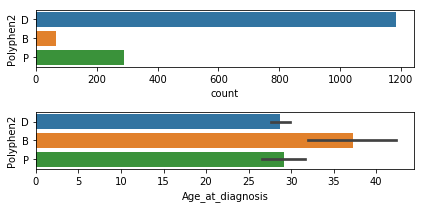

In [59]:
plot_number_and_age(df,col_name,PP2s,(6,3))

#### 11.3. Calculate the significance of 'age at diagnosis' difference

In [60]:
effect = cal_age_diff(df,col_name,PP2s)

if effect:
    effect_features['with_effect'].append(col_name)
else:
    effect_features['no_effect'].append(col_name)

* The distributions of age of onset of all samples are NOT equal (p=5.0e-03)


In [61]:
cal_age_diff_by_group(df,col_name,PP2s)

* Group with significant difference (Mann-Whitney test p-value < 0.01):
	P vs B (p = 2.2e-03)
	B vs D (p = 5.3e-04)
* Group with no significant difference (Mann-Whitney test p-value >= 0.01):
	P vs D (p = 4.1e-01)


## Conclusion

* Categorical variables with effects on age of tumor onset

In [62]:
effect_features['with_effect']

['Short_topo_combined',
 'Residue_function',
 'Population',
 'Region',
 'DNEclass',
 'AGVGDClass',
 'SIFTClass',
 'Polyphen2']

* Categorical variables without effects on age of tumor onset

In [63]:
effect_features['no_effect']

['Sex', 'Effect', 'Domain_function']